In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)': 'income','Spending Score (1-100)': 'score'}, inplace=True)

In [6]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.shape

(200, 5)

# To check null value

In [8]:
df.isnull().values.any()

False

In [9]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


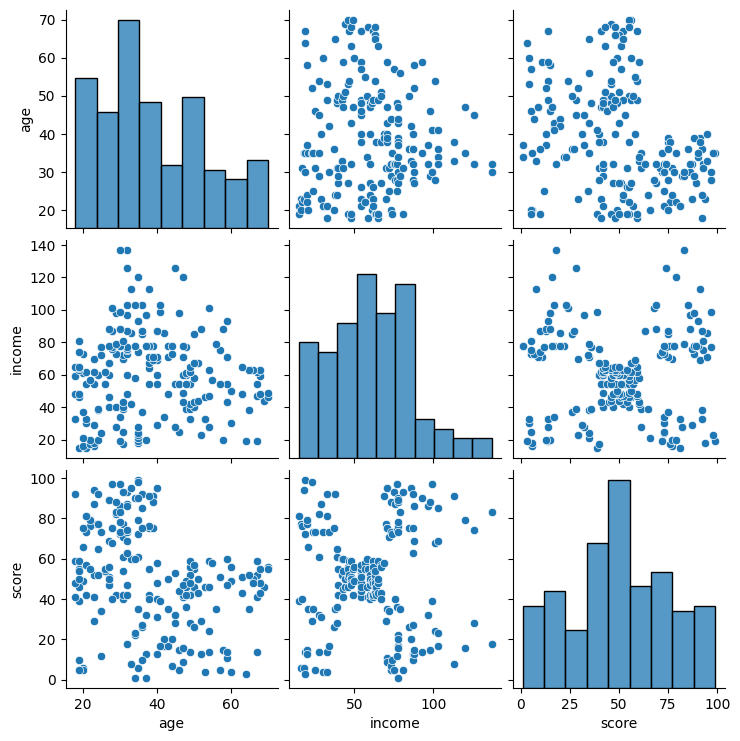

In [12]:
sns.pairplot(df[['age','income','score']])

In [13]:
import sklearn.cluster as cluster

In [16]:
kmeans=cluster.KMeans(n_clusters=5)

In [24]:
kmeans=kmeans.fit(df[['score','income']])

In [25]:
kmeans.cluster_centers_

array([[82.12820513, 86.53846154],
       [49.7125    , 55.0875    ],
       [17.58333333, 87.75      ],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273]])

In [39]:
df['income_clusters']=kmeans.labels_

In [40]:
df

,CustomerID,gender,age,income,score,income_cluster,income_clustes,income_clusters
0,1,Male,19,15,39,3,3,3
1,2,Male,21,15,81,4,4,4
2,3,Female,20,16,6,3,3,3
3,4,Female,23,16,77,4,4,4
4,5,Female,31,17,40,3,3,3
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0,0
196,197,Female,45,126,28,2,2,2
197,198,Male,32,126,74,0,0,0
198,199,Male,32,137,18,2,2,2


In [41]:
df['income_clusters'].value_counts()

,count
income_clusters,
1,80
0,39
2,36
3,23
4,22


<Axes: xlabel='income', ylabel='score'>

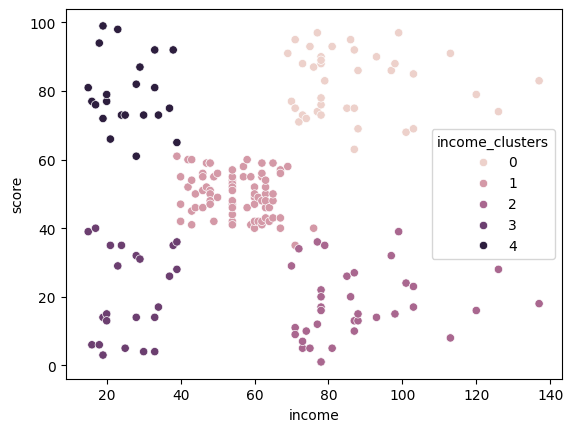

In [43]:
sns.scatterplot(x='income', y='score', hue='income_clusters',data=df)

In [44]:
kmeans=cluster.KMeans(n_clusters=2)

In [45]:
kmeans=kmeans.fit(df[['age','score']])

In [46]:
kmeans.cluster_centers_

array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

In [48]:
df['age_clusters']=kmeans.labels_

In [49]:
df

,CustomerID,gender,age,income,score,income_cluster,income_clustes,income_clusters,age_clusters
0,1,Male,19,15,39,3,3,3,0
1,2,Male,21,15,81,4,4,4,1
2,3,Female,20,16,6,3,3,3,0
3,4,Female,23,16,77,4,4,4,1
4,5,Female,31,17,40,3,3,3,0
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0,0,1
196,197,Female,45,126,28,2,2,2,0
197,198,Male,32,126,74,0,0,0,1
198,199,Male,32,137,18,2,2,2,0


In [50]:
df['age_clusters'].value_counts()

,count
age_clusters,
0,115
1,85


<Axes: xlabel='age', ylabel='score'>

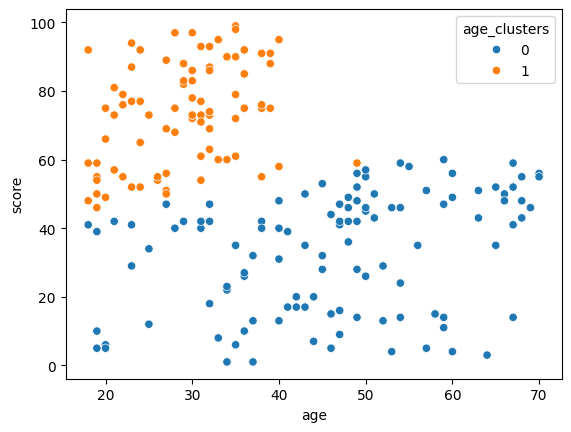

In [52]:
sns.scatterplot(x='age', y='score', hue='age_clusters',data=df)